In [2]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Conv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [105]:
MAX_FEATURES = 10000
MAX_LEN = 50

In [90]:
imdb = datasets.imdb.load_data(num_words=MAX_FEATURES)
word_indexes = datasets.imdb.get_word_index()

In [112]:
print(f'Max 0 class len: {len(max(imdb[0][0], key=len))}')
print(f'Min 0 class len: {len(min(imdb[0][0], key=len))}')
print(f'Max 1 class len: {len(max(imdb[1][0], key=len))}')
print(f'Min 1 class len: {len(min(imdb[1][0], key=len))}')
print(f'Len 0 class: {len(imdb[0][0])}')
print(f'Len 1 class: {len(imdb[1][0])}')

Max 0 class len: 2494
Min 0 class len: 11
Max 1 class len: 2315
Min 1 class len: 7
Len 0 class: 25000
Len 1 class: 25000


In [81]:
concated = np.concatenate([imdb[0][0], imdb[1][0]])
print(f'Concated array shape: {concated.shape[0]}')

Concated array shape: 50000


In [106]:
padded = pad_sequences(concated, maxlen=MAX_LEN)
print(f'Shape {padded.shape}')

Shape (50000, 50)


In [107]:
labels = np.zeros((50000))
labels[25000:] = 1
print(labels.sum())
labels

25000.0


array([0., 0., 0., ..., 1., 1., 1.])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=.25, random_state=42)

In [109]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (37500, 50)
y_train shape: (37500,)

X_test shape: (12500, 50)
y_test shape: (12500,)


In [111]:
model = Sequential()
model.add(Embedding(10000, 64, input_length=50))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=2)

Epoch 1/5
1172/1172 - 34s - loss: 0.6929 - acc: 0.5176 - auc: 0.5226 - val_loss: 0.6920 - val_acc: 0.5210 - val_auc: 0.5246
Epoch 2/5
1172/1172 - 34s - loss: 0.5479 - acc: 0.7183 - auc: 0.7936 - val_loss: 0.8039 - val_acc: 0.5239 - val_auc: 0.5315
Epoch 3/5
1172/1172 - 34s - loss: 0.1243 - acc: 0.9541 - auc: 0.9905 - val_loss: 1.6372 - val_acc: 0.5206 - val_auc: 0.5235
Epoch 4/5
1172/1172 - 34s - loss: 0.0309 - acc: 0.9914 - auc: 0.9988 - val_loss: 2.5285 - val_acc: 0.5232 - val_auc: 0.5275
Epoch 5/5
1172/1172 - 34s - loss: 0.0184 - acc: 0.9929 - auc: 0.9996 - val_loss: 2.9546 - val_acc: 0.5150 - val_auc: 0.5193


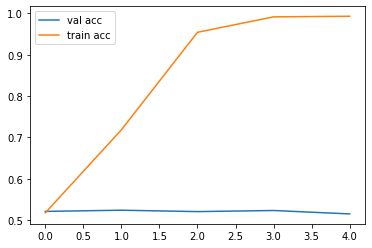

In [120]:
plt.plot(range(0, 5), model.history.history['val_acc'], label='val acc')
plt.plot(range(0, 5), model.history.history['acc'], label='train acc')
plt.legend(loc='best');

Epoch 1/5
1172/1172 - 17s - loss: 0.7081 - acc: 0.4990 - auc: 0.4981 - val_loss: 0.6956 - val_acc: 0.5023 - val_auc: 0.5010
Epoch 2/5
1172/1172 - 17s - loss: 0.6992 - acc: 0.5077 - auc: 0.5140 - val_loss: 0.6962 - val_acc: 0.4993 - val_auc: 0.4996
Epoch 3/5
1172/1172 - 17s - loss: 0.6994 - acc: 0.5045 - auc: 0.5060 - val_loss: 0.6954 - val_acc: 0.4999 - val_auc: 0.4994
Epoch 4/5
1172/1172 - 17s - loss: 0.6988 - acc: 0.4971 - auc: 0.4974 - val_loss: 0.6948 - val_acc: 0.4998 - val_auc: 0.5000
Epoch 5/5
1172/1172 - 17s - loss: 0.7023 - acc: 0.5034 - auc: 0.5031 - val_loss: 0.6933 - val_acc: 0.5004 - val_auc: 0.5000


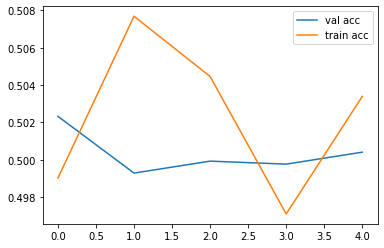

In [124]:
model = Sequential()
model.add(Embedding(10000, 64, input_length=50))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=.01), metrics=['acc', 'AUC'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=2)
plt.plot(range(0, 5), model.history.history['val_acc'], label='val acc')
plt.plot(range(0, 5), model.history.history['acc'], label='train acc')
plt.legend(loc='best');

In [82]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)

X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [83]:
X_train_r = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=3)
X_test_r = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=3)
print(f'X_train shape: {X_train_r.shape}')
print()
print(f'X_test shape: {X_test_r.shape}')

X_train shape: (60000, 28, 28, 3)

X_test shape: (10000, 28, 28, 3)


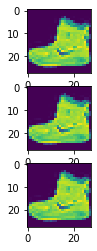

In [107]:
_, axis = plt.subplots(3)
for i, a in enumerate(axis.ravel()):
    a.imshow(X_train_r[0, :, :, i])


model = Sequential()
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train_r, y_train, validation_data=(X_test_r, y_test), epochs=15, verbose=2)
plt.plot(range(0, 15), model.history.history['val_acc'], label='val acc')
plt.plot(range(0, 15), model.history.history['acc'], label='train acc')
plt.legend(loc='best');